In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import math
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [3]:
bank_df= pd.read_csv('data/data.csv')
bank_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,dmy_Germany,dmy_Spain,dmy_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<b>Split the data into a training set and a test set.

In [4]:
bank_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,dmy_Germany,dmy_Spain,dmy_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [5]:
y_col = 'Exited'
y = bank_df[y_col]
x = bank_df[bank_df.columns.drop(y_col)]

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=42)

In [7]:
x_train.shape

(7000, 11)

In [8]:
y_train.shape

(7000,)

In [9]:
x_test.shape

(3000, 11)

In [10]:
y_test.shape

(3000,)

<b>Scale the features either by using normalizer or a standard scaler.

In [11]:
std_scaler=StandardScaler().fit(x_train)

x_train_scaled=std_scaler.transform(x_train)

In [12]:
x_test_scaled=std_scaler.transform(x_test)

In [13]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[-0.34459497 -0.65674999 -0.34217046 ... -0.57559072  1.73073215
  -1.09823226]
 [-0.09518109 -0.46637979  0.69816249 ...  1.73734559 -0.57779016
  -1.09823226]
 [-0.94734518 -0.56156489  0.35138484 ... -0.57559072 -0.57779016
   0.91055421]
 ...
 [ 0.86090545 -0.08563939 -1.38250341 ... -0.57559072 -0.57779016
  -1.09823226]
 [ 0.15423279  0.39028611  1.04494014 ... -0.57559072 -0.57779016
   0.91055421]
 [ 0.46600014  1.1517669  -1.38250341 ...  1.73734559 -0.57779016
   0.91055421]]
--------
[[-0.5836166  -0.65674999 -0.68894811 ...  1.73734559 -0.57779016
   0.91055421]
 [-0.30302599  0.39028611 -1.38250341 ... -0.57559072 -0.57779016
   0.91055421]
 [-0.53165538  0.48547121 -0.34217046 ... -0.57559072  1.73073215
  -1.09823226]
 ...
 [-0.44851742 -0.65674999  0.69816249 ... -0.57559072 -0.57779016
   0.91055421]
 [-0.74989252 -0.75193509 -1.03572576 ... -0.57559072 -0.57779016
   0.91055421]
 [-1.23832804 -1.60860099  1.73849544 ...  1.73734559 -0.57779016
  -1.09823226]]


<b>Fit a logistic Regression model on the training data.

,Error_metric,Train,Test
0,Accuracy,0.810143,0.811333
1,Precision,0.618774,0.542056
2,Recall,0.222299,0.198630


Confusion matrix for the train set
[[5348  199]
 [1130  323]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


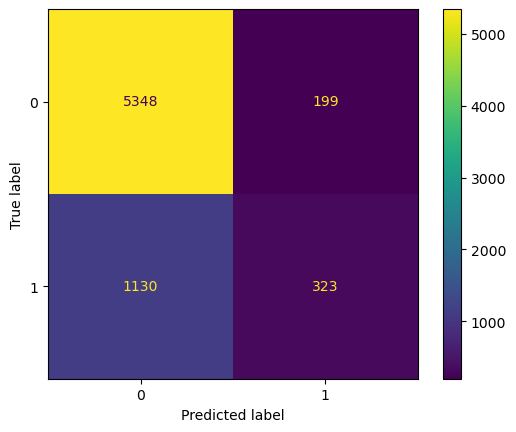



Confusion matrix for the test set
[[2318   98]
 [ 468  116]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


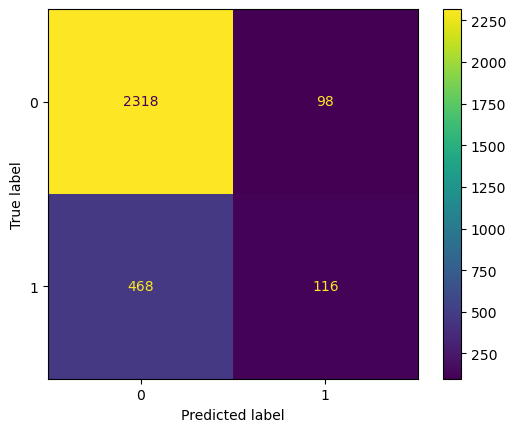

In [14]:
from sklearn.linear_model import LogisticRegression #Classification, regression is just a nme
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred_train_log = log_model.predict(x_train_scaled)
y_pred_test_log = log_model.predict(x_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,x_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,x_test_scaled,y_test, values_format = 'd')
plt.show()

<b>Logistic regression with SMOTE

In [15]:
Y_col = 'Exited'
Y = bank_df[Y_col]
X = bank_df[bank_df.columns.drop(Y_col)]

In [16]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=.30,random_state=42)

In [17]:
X_train.shape

(7000, 11)

In [18]:
Y_train.shape

(7000,)

In [19]:
X_test.shape

(3000, 11)

In [20]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [21]:
smote = SMOTE()
X_train_scaled, Y_train = smote.fit_resample(X_train_scaled, Y_train)

In [22]:
X_test_scaled=std_scaler.transform(X_test)

In [23]:
Y_train.value_counts()

1    5547
0    5547
Name: Exited, dtype: int64

In [24]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.34459497 -0.65674999 -0.34217046 ... -0.57559072  1.73073215
  -1.09823226]
 [-0.09518109 -0.46637979  0.69816249 ...  1.73734559 -0.57779016
  -1.09823226]
 [-0.94734518 -0.56156489  0.35138484 ... -0.57559072 -0.57779016
   0.91055421]
 ...
 [-0.76117778  1.11571136  0.59482619 ... -0.57559072 -0.57779016
   0.91055421]
 [-0.85478382  0.7532787   0.50052667 ...  1.73734559 -0.57779016
   0.91055421]
 [ 1.14433826  1.07193172  1.57908729 ...  1.73734559 -0.57779016
   0.91055421]]
--------
[[-0.5836166  -0.65674999 -0.68894811 ...  1.73734559 -0.57779016
   0.91055421]
 [-0.30302599  0.39028611 -1.38250341 ... -0.57559072 -0.57779016
   0.91055421]
 [-0.53165538  0.48547121 -0.34217046 ... -0.57559072  1.73073215
  -1.09823226]
 ...
 [-0.44851742 -0.65674999  0.69816249 ... -0.57559072 -0.57779016
   0.91055421]
 [-0.74989252 -0.75193509 -1.03572576 ... -0.57559072 -0.57779016
   0.91055421]
 [-1.23832804 -1.60860099  1.73849544 ...  1.73734559 -0.57779016
  -1.09823226]]


,Error_metric,Train,Test
0,Accuracy,0.713268,0.710000
1,Precision,0.716587,0.370471
2,Recall,0.705607,0.700342


Confusion matrix for the train set
[[3999 1548]
 [1633 3914]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


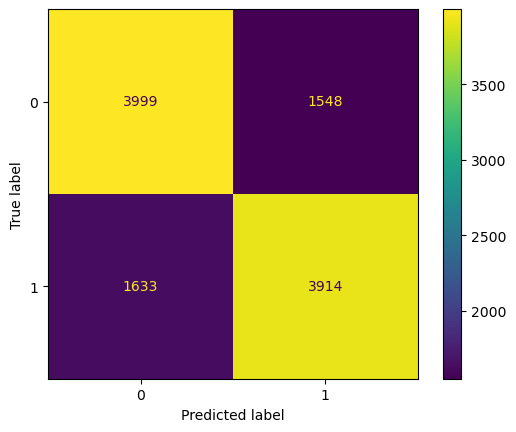



Confusion matrix for the test set
[[1721  695]
 [ 175  409]]


/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


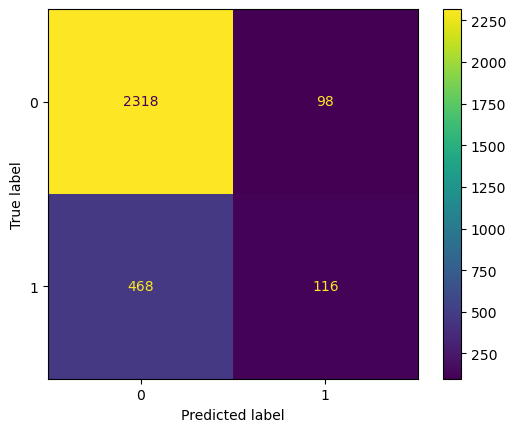

In [25]:

log_model_smt = LogisticRegression()
log_model_smt.fit(X_train_scaled, Y_train)

Y_pred_train_log = log_model_smt.predict(X_train_scaled)
Y_pred_test_log = log_model_smt.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(Y_train, Y_pred_train_log),
                                         precision_score(Y_train, Y_pred_train_log),
                                         recall_score(Y_train, Y_pred_train_log)],
                               'Test': [accuracy_score(Y_test, Y_pred_test_log),
                                        precision_score(Y_test, Y_pred_test_log),
                                        recall_score(Y_test, Y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(Y_train,Y_pred_train_log))
plot_confusion_matrix(log_model_smt,X_train_scaled,Y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(Y_test, Y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,Y_test, values_format = 'd')
plt.show()

In [26]:
log_model.predict(X_test)

/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

<b> Prediction

In [27]:
i_CreditScore = int(input("Customer's CreditScore: "))
i_Age = int(input("Customer's Age: "))
i_Tenure = int(input("How many years is the customer with us: "))
i_Balance = float(input("Customer's Balance: "))
i_NumOfProducts = int(input("How many products does the customer use: "))
i_HasCrCard = int(input("Credit Card (Yes: 1, No: 0): "))
i_IsActiveMember = int(input("Active (Yes: 1, No: 0): "))
i_EstimatedSalary = float(input("Customer's Salary: "))
i_Germany = int(input("Country (Germany: 1, Rest: 0): "))
i_Spain = int(input("Country (Spain: 1, Rest: 0): "))
i_Gender = int(input("Gender(Male 1, Female: 0): "))




Customer's CreditScore: 620
Customer's Age: 21
How many years is the customer with us: 2
Customer's Balance: 21000
How many products does the customer use: 1
Credit Card (Yes: 1, No: 0): 0
Active (Yes: 1, No: 0): 1
Customer's Salary: 1000
Country (Germany: 1, Rest: 0): 1
Country (Spain: 1, Rest: 0): 0
Gender(Male 1, Female: 0): 1


In [28]:
new_data = pd.DataFrame(columns=["i_CreditScore", "i_Age", "i_Tenure", "i_Balance", "i_NumOfProducts", "i_HasCrCard",
                                  "i_IsActiveMember", "i_EstimatedSalary", "i_Germany", "i_Spain", "i_Gender"])



In [29]:
new_data.loc[0] = pd.Series({"i_CreditScore":i_CreditScore, "i_Age":i_Age, "i_Tenure":i_Tenure, "i_Balance":i_Balance,
                             "i_NumOfProducts":i_NumOfProducts, "i_HasCrCard":i_HasCrCard, "i_IsActiveMember":i_IsActiveMember,
                             "i_EstimatedSalary":i_EstimatedSalary,"i_Germany":i_Germany, "i_Spain":i_Spain, "i_Gender":i_Gender})

In [30]:
new_data = std_scaler.transform(new_data)
new_data

/Users/nicola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- i_Age
- i_Balance
- i_CreditScore
- i_EstimatedSalary
- i_Gender
- ...
Feature names seen at fit time, yet now missing:
- Age
- Balance
- CreditScore
- EstimatedSalary
- HasCrCard
- ...

  warnings.warn(message, FutureWarning)


array([[-0.33420272, -1.70378609, -1.03572576, -0.88614079, -0.90335195,
        -1.54803408,  0.97071435, -1.73141072,  1.73734559, -0.57779016,
         0.91055421]])

In [31]:
new_data

array([[-0.33420272, -1.70378609, -1.03572576, -0.88614079, -0.90335195,
        -1.54803408,  0.97071435, -1.73141072,  1.73734559, -0.57779016,
         0.91055421]])

In [32]:
log_model_smt.predict_proba(new_data)

array([[0.86969086, 0.13030914]])

In [33]:
for n in result1:
    if np.max(log_model_smt.predict_proba(new_data)) == result1[0][1]:
        print("The chance that the customer will churn is: ",+ np.max(log_model_smt.predict_proba(new_data))*100,"%")
    else:
        print("The chance that the customer will churn is: ",+ 100 -(np.max(log_model_smt.predict_proba(new_data))*100),"%")

NameError: name 'result1' is not defined

In [34]:
result1=log_model_smt.predict_proba(result)

NameError: name 'result' is not defined

In [ ]:
result1

array([[0., 1.]])

In [ ]:
log_model_smt.predict_proba(X_test_scaled[:10, :])

array([[0.49478545, 0.50521455],
       [0.73989118, 0.26010882],
       [0.3593224 , 0.6406776 ],
       [0.21339262, 0.78660738],
       [0.78846476, 0.21153524],
       [0.85942244, 0.14057756],
       [0.42510121, 0.57489879],
       [0.54740362, 0.45259638],
       [0.34669566, 0.65330434],
       [0.33742282, 0.66257718]])

<b> Save the logistic regression model

In [28]:
import pickle

In [29]:
filename="churn_predict_model"
pickle.dump(log_model_smt,open(filename,'wb'))

In [30]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(X_test_scaled)

array([1, 0, 1, ..., 0, 0, 0])